In [1]:
library("plyr")
library(descr)
library("tidyverse")
data <- read.csv(file="../input/Career.csv")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0       v purrr   0.3.0  
v tibble  2.0.1       v dplyr   0.8.0.1
v tidyr   0.8.2       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise() masks plyr::summarise()
x dplyr::summarize() masks plyr::summarize()


In [2]:
head(data)

college,year,stream,cgpa,X12th,X10th,career,parents,income,locality,state
IIITs,2nd,"Computer science and engineering,",<6,Private School,Private School,Higher study,Public Sector,> 10 lakhs,Urban,Rajasthan
Government,4th,"Chemical engineering,",6-8,Private School,Private School,Public Sector Job,Public Sector,3-6 lakhs,Urban,Haryana
NITs,4th,"Civil engineering,",6-8,Private School,Private School,Public Sector Job,Self-Employed,< 3 lakhs,Rural,Rajasthan
Government,4th,"Electronics and communication engineering,",6-8,Private School,Private School,Entrepreneurship,Public Sector,> 10 lakhs,Urban,Delhi
Private,3rd,"Information technology,",6-8,Private School,Private School,Private Sector job,Business,3-6 lakhs,Urban,Uttar Pradesh
IIITs,1st,"Computer science and engineering,",>8,Private School,Private School,Private Sector job,Self-Employed,3-6 lakhs,Urban,Uttar Pradesh


In [3]:
summary(data)

       college     year                                            stream   
 Government: 48   1st:104   Computer science and engineering,         :123  
 IIITs     :133   2nd: 56   Electronics and communication engineering,: 89  
 IITs      :  6   3rd: 81   Mechanical engineering,                   : 33  
 NITs      :109   4th: 97   Electrical engineering,                   : 25  
 Private   : 42             Civil engineering,                        : 17  
                            Information technology,                   : 16  
                            (Other)                                   : 35  
  cgpa                X12th                X10th                    career   
 <6 : 25   Private School:237   Private School:243   Defence           : 18  
 >8 :128   Public School :101   Public School : 95   Entrepreneurship  : 36  
 6-8:185                                             Family business   :  2  
                                                     Higher study      :

In [4]:
str(data)

'data.frame':	338 obs. of  11 variables:
 $ college : Factor w/ 5 levels "Government","IIITs",..: 2 1 4 1 5 2 2 2 2 2 ...
 $ year    : Factor w/ 4 levels "1st","2nd","3rd",..: 2 4 4 4 3 1 2 2 3 1 ...
 $ stream  : Factor w/ 13 levels "Biological engineering",..: 5 2 3 8 9 5 8 5 8 8 ...
 $ cgpa    : Factor w/ 3 levels "<6",">8","6-8": 1 3 3 3 3 2 1 3 3 1 ...
 $ X12th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ X10th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ career  : Factor w/ 6 levels "Defence","Entrepreneurship",..: 4 6 6 2 5 5 6 5 5 2 ...
 $ parents : Factor w/ 5 levels "Business","Defence",..: 4 4 5 4 1 5 5 4 3 1 ...
 $ income  : Factor w/ 4 levels "< 3 lakhs","> 10 lakhs",..: 2 3 1 2 3 3 1 4 1 2 ...
 $ locality: Factor w/ 2 levels "Rural","Urban": 2 2 1 2 2 2 1 2 2 2 ...
 $ state   : Factor w/ 19 levels "Abroad","Andhra Pradesh",..: 15 6 15 4 17 17 3 17 15 17 ...


In [5]:
data$stream <- revalue(data$stream,c(
    'Computer science and engineering,'='COMP','Electronics and communication engineering,'='ELEC',
    'Information technology,'='COMP','Mechanical engineering,'='MECH','Civil engineering,'='MECH',
    'Mechatronics engineering,'='MECH','Electrical and electronics and engineering'='ELEC',
    'Environmental engineering,'='CHEM','Architecture and construction engineering,'='MECH',
    'Highway engineering,'='MECH','Computer engineering,'='COMP','Marine engineering,'='CHEM',
    'Automobile engineering,'='MECH','Aeronautical engineering,'='MECH','Aerospace engineering,'='MECH',
    'Telecommunication engineering,'='ELEC','Electronics and communication engineering,'='ELEC',
    'Agricultural engineering,'='CHEM','Production and industrial engineering,'='MECH',
    'Chemical engineering,'='CHEM','Electrical engineering,'='ELEC','Instrumental engineering,'='ELEC',
    'Mining engineering,'='CHEM','Architectural'='MECH','Biological Science'='CHEM','Bio-Medical'='CHEM',
    'Biological engineering'='CHEM','Nuclear engineering'='CHEM','Systems engineering'='COMP','Others'=-1
))

The following `from` values were not present in `x`: Mechatronics engineering,, Environmental engineering,, Architecture and construction engineering,, Highway engineering,, Marine engineering,, Automobile engineering,, Aeronautical engineering,, Aerospace engineering,, Telecommunication engineering,, Electronics and communication engineering,, Agricultural engineering,, Instrumental engineering,, Architectural, Biological Science, Bio-Medical, Nuclear engineering, Systems engineering


In [6]:
data$state <- revalue(data$state,c(
    'Rajasthan'='W','Delhi'='N','Haryana'='N','Punjab'='N','Chandigarh'='N','Andhra Pradesh'='S',
    'Telangana'='S','Arunachal Pradesh'='E','Assam'='E','Bihar'='C','Chhattisgarh'='C','Goa'='S',
    'Gujarat'='W','Himachal Pradesh'='N','Jammu and Kashmir'='N','Jharkhand'='C','Karnataka'='S',
    'Kerala'='S','Madhya Pradesh'='C','Maharashtra'='C','Manipur'='E','Meghalaya'='E','Mizoram'='E',
    'Nagaland'='E','Odisha'='E','Sikkim'='E','Tamil Nadu'='S','Tripura'='E','Uttar Pradesh'='N',
    'Uttarakhand'='N','West Bengal'='E','Andaman and Nicobar Islands'='S',
    'Dadra and Nagar Haveli'='W','Daman and Diu'='W','Lakshadweep'='S','Pondicherry'='S',
    'Abroad'=-1
))

The following `from` values were not present in `x`: Chandigarh, Arunachal Pradesh, Assam, Chhattisgarh, Goa, Himachal Pradesh, Jammu and Kashmir, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, Tamil Nadu, Tripura, Andaman and Nicobar Islands, Dadra and Nagar Haveli, Daman and Diu, Pondicherry


In [9]:
data$career <- revalue(data$career,c('Defence'='DEF','Entrepreneurship'='E','Family business'='FB','Higher study'='HS',
                                     'Private Sector job'='PRIVATE','Public Sector Job'='PUBLIC'))
    

In [10]:
str(data)

'data.frame':	338 obs. of  11 variables:
 $ college : Factor w/ 5 levels "Government","IIITs",..: 2 1 4 1 5 2 2 2 2 2 ...
 $ year    : Factor w/ 4 levels "1st","2nd","3rd",..: 2 4 4 4 3 1 2 2 3 1 ...
 $ stream  : Factor w/ 5 levels "CHEM","MECH",..: 3 1 2 4 3 3 4 3 4 4 ...
 $ cgpa    : Factor w/ 3 levels "<6",">8","6-8": 1 3 3 3 3 2 1 3 3 1 ...
 $ X12th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ X10th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ career  : Factor w/ 6 levels "DEF","E","FB",..: 4 6 6 2 5 5 6 5 5 2 ...
 $ parents : Factor w/ 5 levels "Business","Defence",..: 4 4 5 4 1 5 5 4 3 1 ...
 $ income  : Factor w/ 4 levels "< 3 lakhs","> 10 lakhs",..: 2 3 1 2 3 3 1 4 1 2 ...
 $ locality: Factor w/ 2 levels "Rural","Urban": 2 2 1 2 2 2 1 2 2 2 ...
 $ state   : Factor w/ 6 levels "-1","S","C","N",..: 5 4 5 4 4 4 3 4 5 4 ...


In [ ]:
ggplot(data,aes(x=college )) +
    geom_bin2d(aes(y=career))

Saving 6.67 x 6.67 in image


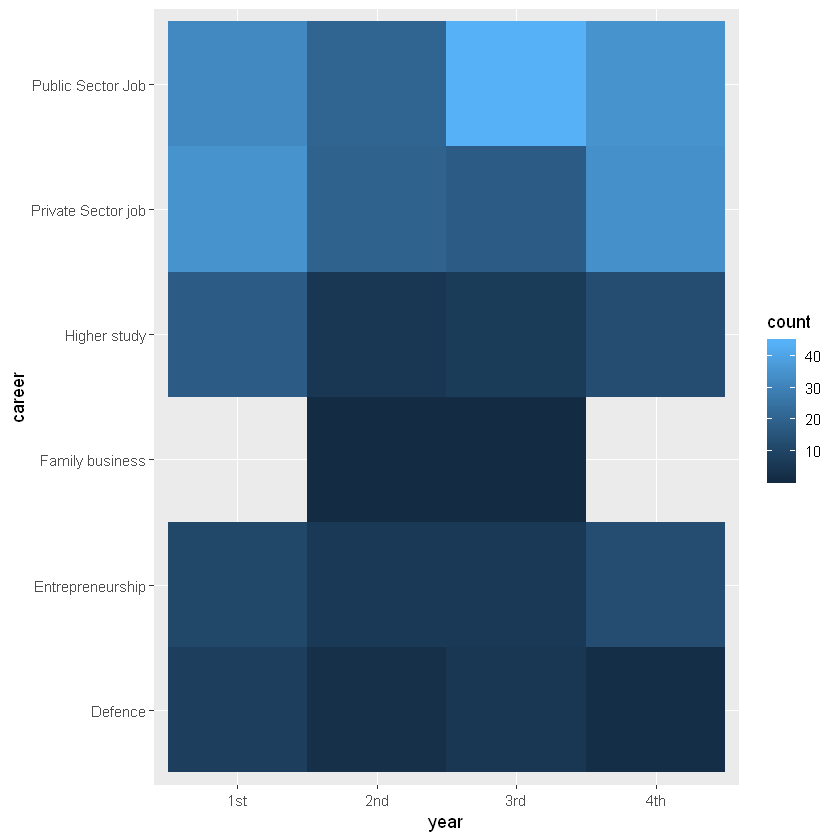

In [18]:
ggsave(filename="../analysis/college.jpg", plot=last_plot())
ggplot(data,aes(year  ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


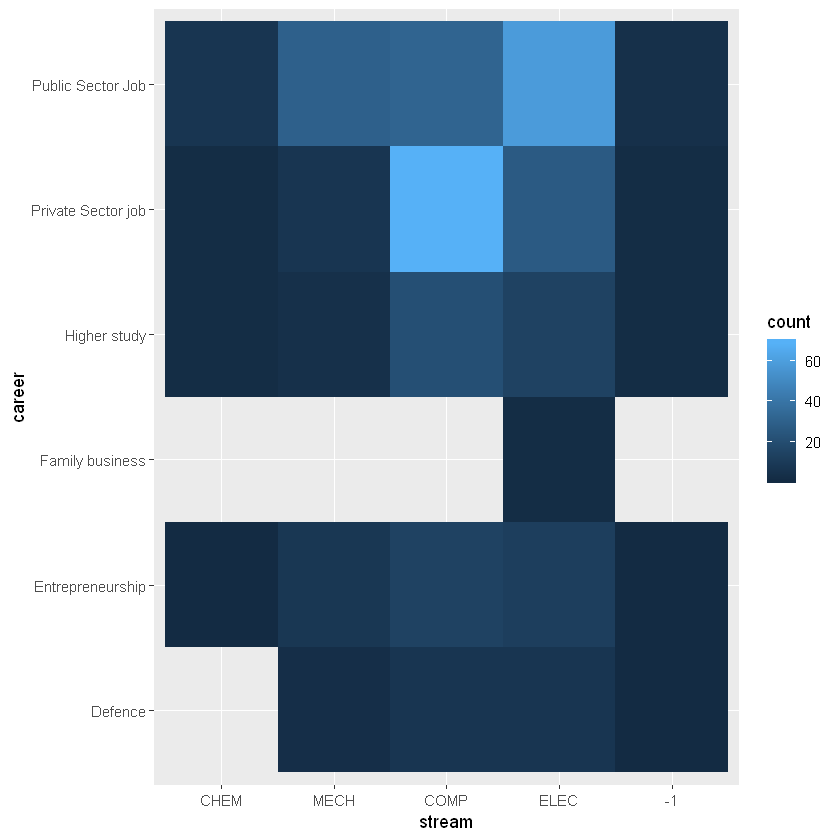

In [16]:
ggsave(filename="../analysis/year.jpg", plot=last_plot())
ggplot(data,aes(stream  ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


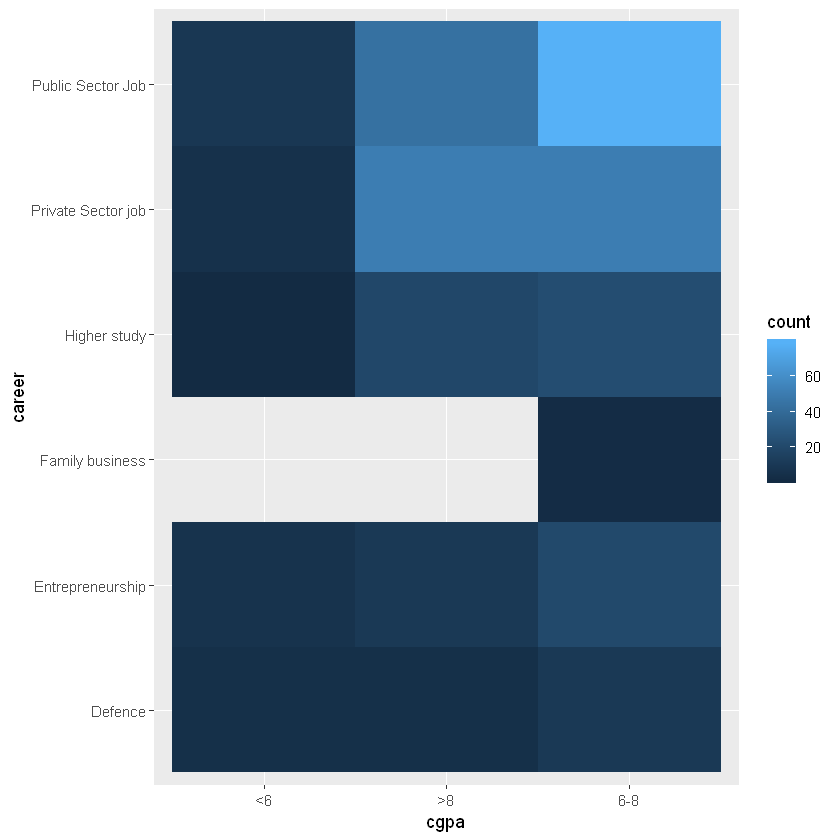

In [17]:
ggsave(filename="../analysis/stream.jpg", plot=last_plot())
ggplot(data,aes(cgpa    ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


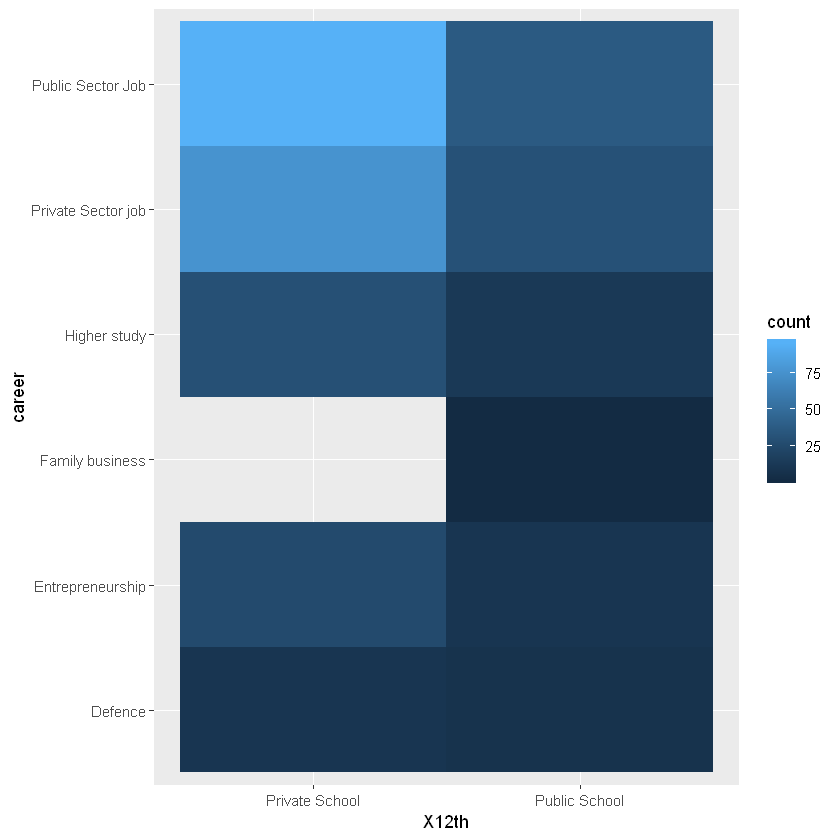

In [18]:
ggsave(filename="../analysis/cgpa.jpg", plot=last_plot())
ggplot(data,aes(X12th   ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


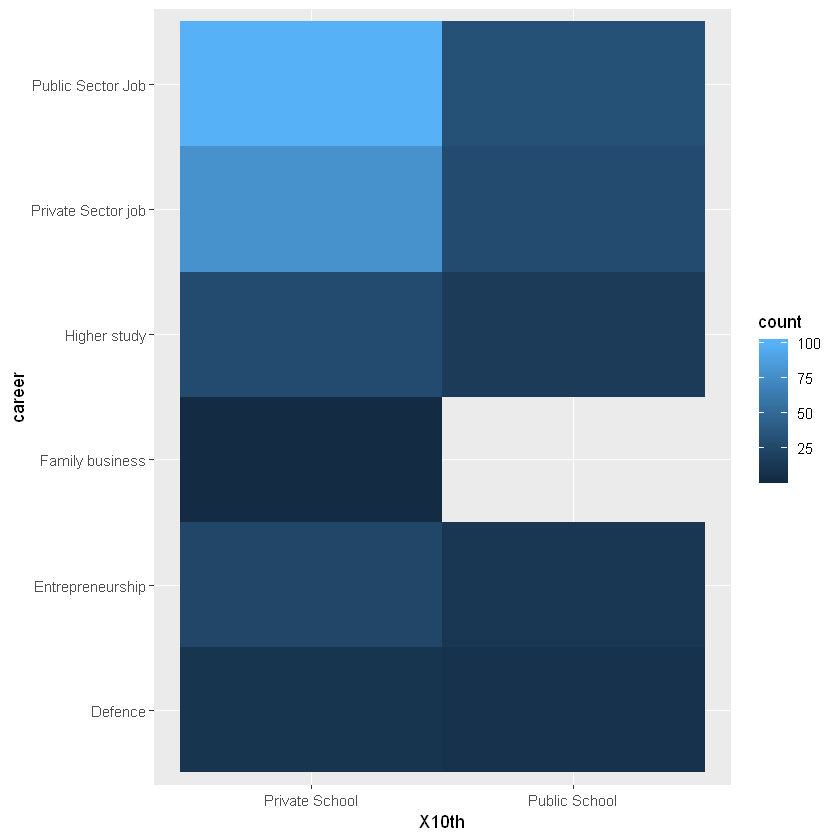

In [19]:
ggsave(filename="../analysis/X12th.jpg", plot=last_plot())
ggplot(data,aes(X10th   ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


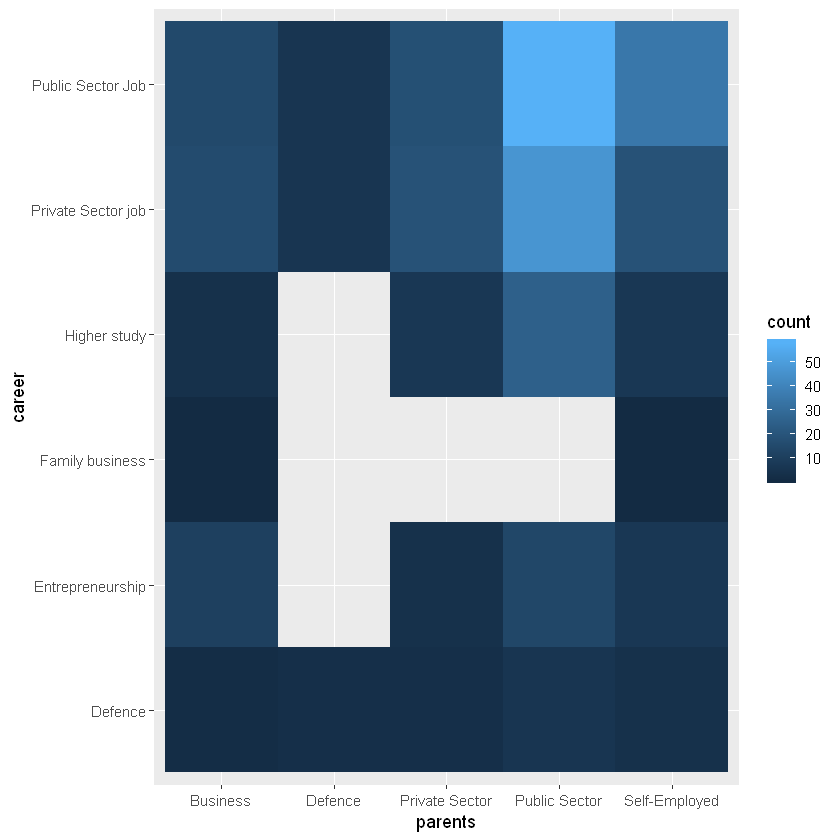

In [20]:
ggsave(filename="../analysis/X10th.jpg", plot=last_plot())
ggplot(data,aes(parents ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


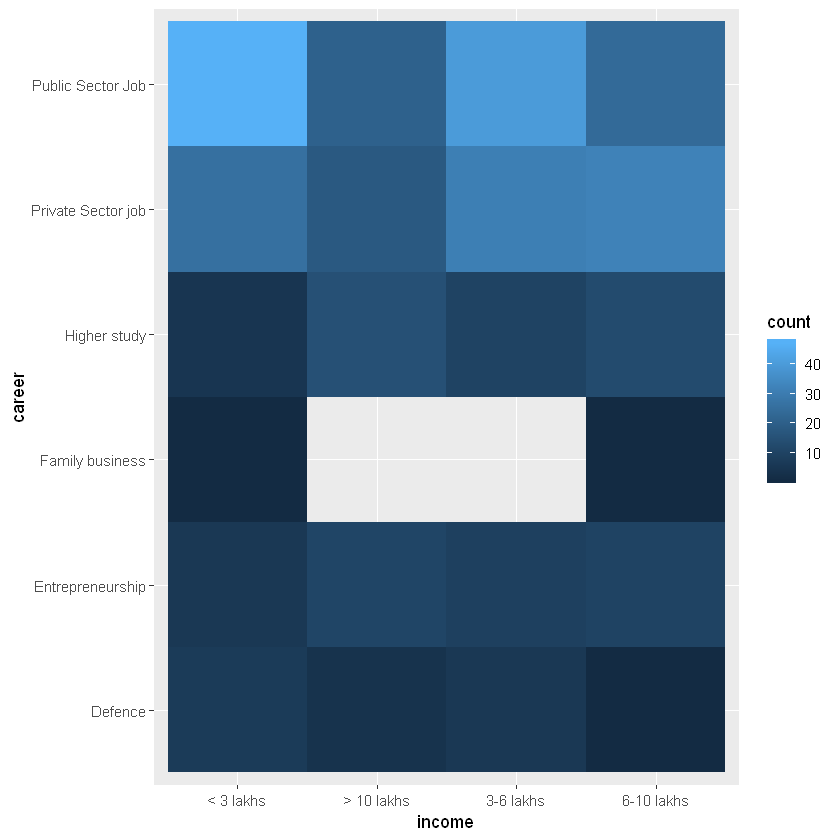

In [21]:
ggsave(filename="../analysis/parents.jpg", plot=last_plot())
ggplot(data,aes(income  ,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


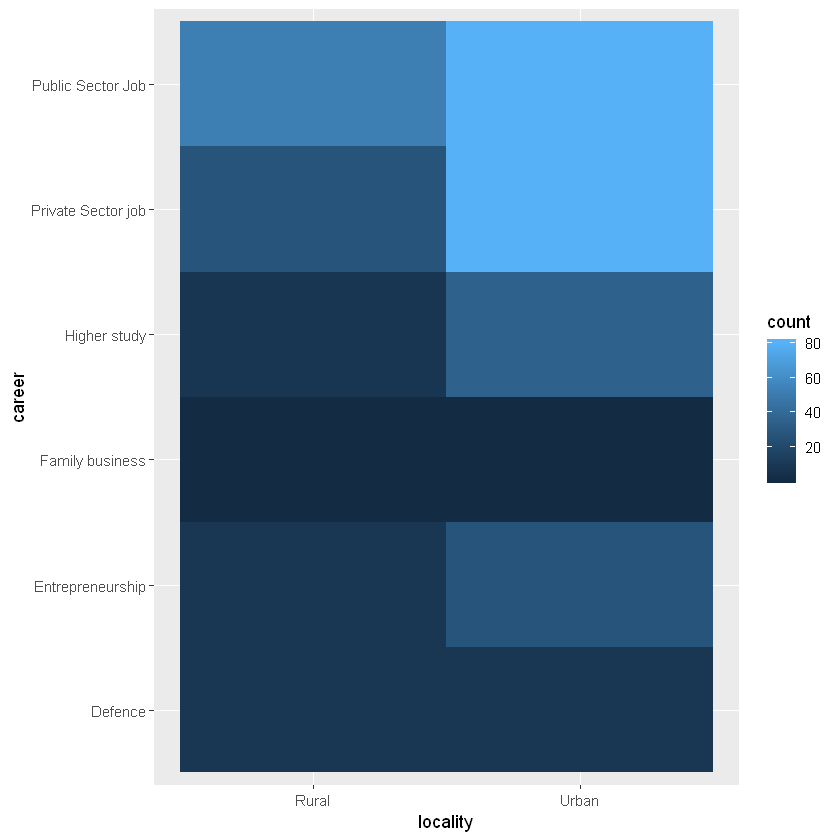

In [22]:
ggsave(filename="../analysis/income.jpg", plot=last_plot())
ggplot(data,aes(locality,career)) +
    geom_bin2d()

Saving 6.67 x 6.67 in image


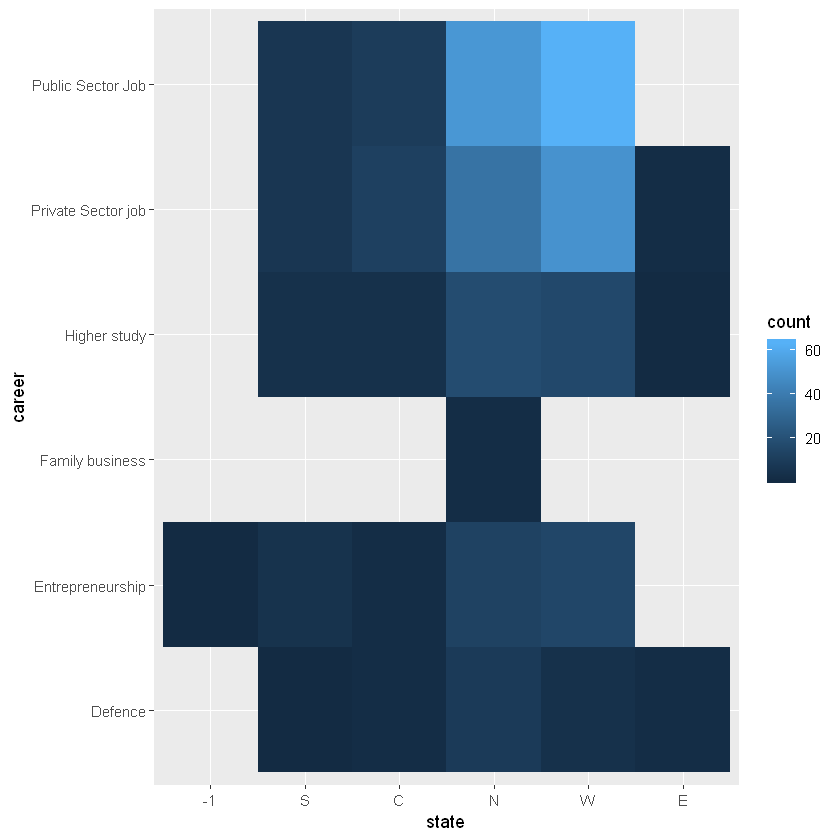

In [23]:
ggsave(filename="../analysis/locality.jpg", plot=last_plot())
ggplot(data,aes(state   ,career)) +
    geom_bin2d()

In [24]:
ggsave(filename="../analysis/state.jpg", plot=last_plot())

Saving 6.67 x 6.67 in image


In [13]:
jpeg("../analysis/college-mosaic.png")
crosstab(data$college,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/year-mosaic.png")
crosstab(data$year,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/stream-mosaic.png")
crosstab(data$stream,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/cgpa-mosaic.png")
crosstab(data$cgpa,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/X12th-mosaic.png")
crosstab(data$X12th,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/X10th-mosaic.png")
crosstab(data$X10th,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/parents-mosaic.png")
crosstab(data$parents,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/income-mosaic.png")
crosstab(data$income,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/locality-mosaic.png")
crosstab(data$locality,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()
jpeg("../analysis/state-mosaic.png")
crosstab(data$state,data$career, prop.r=TRUE, format=c("SPSS")) 
dev.off()

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                data$career
data$college      DEF       E     FB      HS   PRIVATE   PUBLIC   Total
-----------------------------------------------------------------------
Government         5       4      1       6         6       26      48 
                10.4%    8.3%   2.1%   12.5%     12.5%    54.2%   14.2%
-----------------------------------------------------------------------
IIITs              4      11      0      17        56       45     133 
                 3.0%    8.3%   0.0%   12.8%     42.1%    33.8%   39.3%
-----------------------------------------------------------------------
IITs               0       1      0       1         2        2       6 
                 0.0%   16.7%   0.0%   16.7%     33.3%    33.3%    1.8%
-----------------------------------------------------------------------
NITs               6      14      0      12    

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

             data$career
data$year     DEF       E     FB      HS   PRIVATE   PUBLIC   Total
-------------------------------------------------------------------
1st            8      11      0      18        35       32     104 
             7.7%   10.6%   0.0%   17.3%     33.7%    30.8%   30.8%
-------------------------------------------------------------------
2nd            3       6      1       5        20       21      56 
             5.4%   10.7%   1.8%    8.9%     35.7%    37.5%   16.6%
-------------------------------------------------------------------
3rd            5       6      1       7        18       44      81 
             6.2%    7.4%   1.2%    8.6%     22.2%    54.3%   24.0%
-------------------------------------------------------------------
4th            2      13      0      13        34       35      97 
             2.1%   13.4% 

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

               data$career
data$stream      DEF       E     FB      HS   PRIVATE   PUBLIC   Total
----------------------------------------------------------------------
CHEM              0       1      0       2         2        7      12 
                0.0%    8.3%   0.0%   16.7%     16.7%    58.3%    3.6%
----------------------------------------------------------------------
MECH              3       8      0       4         7       30      52 
                5.8%   15.4%   0.0%    7.7%     13.5%    57.7%   15.4%
----------------------------------------------------------------------
COMP              7      14      0      21        69       32     143 
                4.9%    9.8%   0.0%   14.7%     48.3%    22.4%   42.3%
----------------------------------------------------------------------
ELEC              7      12      2      14        27       

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

             data$career
data$cgpa      DEF       E     FB      HS   PRIVATE   PUBLIC   Total
--------------------------------------------------------------------
<6              4       6      0       1         5        9      25 
             16.0%   24.0%   0.0%    4.0%     20.0%    36.0%    7.4%
--------------------------------------------------------------------
>8              4      10      0      19        51       44     128 
              3.1%    7.8%   0.0%   14.8%     39.8%    34.4%   37.9%
--------------------------------------------------------------------
6-8            10      20      2      23        51       79     185 
              5.4%   10.8%   1.1%   12.4%     27.6%    42.7%   54.7%
--------------------------------------------------------------------
Total          18      36      2      43       107      132     338 

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                  data$career
data$X12th         DEF       E     FB      HS   PRIVATE   PUBLIC   Total
------------------------------------------------------------------------
Private School     10      26      0      30        76       95     237 
                  4.2%   11.0%   0.0%   12.7%     32.1%    40.1%   70.1%
------------------------------------------------------------------------
Public School       8      10      2      13        31       37     101 
                  7.9%    9.9%   2.0%   12.9%     30.7%    36.6%   29.9%
------------------------------------------------------------------------
Total              18      36      2      43       107      132     338 

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                  data$career
data$X10th         DEF       E     FB      HS   PRIVATE   PUBLIC   Total
------------------------------------------------------------------------
Private School     10      24      2      28        79      100     243 
                  4.1%    9.9%   0.8%   11.5%     32.5%    41.2%   71.9%
------------------------------------------------------------------------
Public School       8      12      0      15        28       32      95 
                  8.4%   12.6%   0.0%   15.8%     29.5%    33.7%   28.1%
------------------------------------------------------------------------
Total              18      36      2      43       107      132     338 

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                  data$career
data$parents        DEF       E     FB      HS   PRIVATE   PUBLIC   Total
-------------------------------------------------------------------------
Business             2      11      1       4        16       15      49 
                   4.1%   22.4%   2.0%    8.2%     32.7%    30.6%   14.5%
-------------------------------------------------------------------------
Defence              3       0      0       0         6        6      15 
                  20.0%    0.0%   0.0%    0.0%     40.0%    40.0%    4.4%
-------------------------------------------------------------------------
Private Sector       3       4      0       7        19       18      51 
                   5.9%    7.8%   0.0%   13.7%     37.3%    35.3%   15.1%
-------------------------------------------------------------------------
Public Sector        6 

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

               data$career
data$income     DEF       E     FB      HS   PRIVATE   PUBLIC   Total
---------------------------------------------------------------------
< 3 lakhs        7       6      1       5        26       47      92 
               7.6%    6.5%   1.1%    5.4%     28.3%    51.1%   27.2%
---------------------------------------------------------------------
> 10 lakhs       4      11      0      15        18       21      69 
               5.8%   15.9%   0.0%   21.7%     26.1%    30.4%   20.4%
---------------------------------------------------------------------
3-6 lakhs        6       9      0      10        31       40      96 
               6.2%    9.4%   0.0%   10.4%     32.3%    41.7%   28.4%
---------------------------------------------------------------------
6-10 lakhs       1      10      1      13        32       24      81 


png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                 data$career
data$locality     DEF       E     FB      HS   PRIVATE   PUBLIC   Total
-----------------------------------------------------------------------
Rural              9       9      1       8        27       52     106 
                 8.5%    8.5%   0.9%    7.5%     25.5%    49.1%   31.4%
-----------------------------------------------------------------------
Urban              9      27      1      35        80       80     232 
                 3.9%   11.6%   0.4%   15.1%     34.5%    34.5%   68.6%
-----------------------------------------------------------------------
Total             18      36      2      43       107      132     338 

png 
  2

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

              data$career
data$state      DEF        E     FB      HS   PRIVATE   PUBLIC   Total
----------------------------------------------------------------------
-1               0        1      0       0         0        0       1 
               0.0%   100.0%   0.0%    0.0%      0.0%     0.0%    0.3%
----------------------------------------------------------------------
S                1        5      0       4         7        7      24 
               4.2%    20.8%   0.0%   16.7%     29.2%    29.2%    7.1%
----------------------------------------------------------------------
C                2        2      0       4        12       10      30 
               6.7%     6.7%   0.0%   13.3%     40.0%    33.3%    8.9%
----------------------------------------------------------------------
N                9       13      2      18        36       5

png 
  2